# 🏘️ California Housing 🏘️

Este proyecto se centra en el análisis y la predicción de precios de viviendas en el estado de California utilizando un dataset que contiene información detallada sobre 20,640 bloques residenciales. Cada fila en el dataset representa un bloque, que es una pequeña área geográfica delimitada por calles y que contiene un grupo de viviendas. Las variables incluidas en el dataset abarcan aspectos geográficos, demográficos y económicos que influyen en el mercado inmobiliario. En particular, se tienen en cuenta la longitud y latitud de las propiedades para analizar su ubicación relativa, la antigüedad media de las viviendas en cada bloque, el número total de habitaciones y dormitorios, así como la población y el número de hogares en cada bloque. Además, el dataset incluye datos sobre el ingreso medio de los hogares y el valor medio de las viviendas, medidos en dólares estadounidenses, así como la proximidad al océano, una característica que puede tener un impacto significativo en los valores de las propiedades.

El objetivo principal de este proyecto es identificar los factores clave que determinan los precios de las viviendas en California y desarrollar un modelo de machine learning capaz de predecir el valor de una casa en función de estas características. Este análisis no solo proporcionará una comprensión más profunda de las dinámicas del mercado inmobiliario en California, sino que también permitirá evaluar la relación entre la ubicación, las características estructurales, y las condiciones socioeconómicas en los precios de las viviendas. Los resultados obtenidos a partir de este estudio podrán ser aplicados en la valoración de propiedades, la planificación urbana y en la toma de decisiones tanto para compradores como para vendedores de bienes raíces.

Descripcion de columnas:

-latitude: latitud de la ubicacion del bloque.

-longitude: longitud de la ubicacion del bloque.

-housing_median_age: mediana de edad de las propiedades en el bloque.

-total_rooms: habitaciones totales en el bloque.

-total_bedrooms: dormitorios totales en el bloque.

-population: cantidad de habitantes en el bloque.

-households: cantidad de hogares en el bloque.

-median_income: mediana de ingresos en el bloque.

-median_house_value: mediana de valor de las propiedades en el bloque

-ocean_proximity: proximidad al oceano del bloque

## 📚 Importación de librerias 📚

In [111]:
# importo las librerias que voy a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from seaborn import distplot
from seaborn import histplot
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


## 🔗 Importación de la Base de Datos 🔗

In [112]:
# Importo la base de datos csv de mi Github
url = "https://raw.githubusercontent.com/djender985/CursoDataScience-II/refs/heads/main/Proyecto/housing.csv"
df = pd.read_csv(url, sep=',')

## 🔍 Data Wrangling y EDA 🔎🔬💊

### 🔍 Inspección inicial de datos 🔎

In [113]:
# para conocer la forma del dataset
print("\n")
print('\n\nThe shape of this dataset is:', {df.shape})
print("\n")

# Observo los datos
df.sample(10)





The shape of this dataset is: {(20640, 10)}




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8997,-117.87,33.59,44,2499,396.0,910,374,6.6544,500001,<1H OCEAN
5823,-118.02,33.95,36,1705,299.0,871,296,4.6184,179800,<1H OCEAN
8104,-118.31,33.86,29,2243,361.0,1051,352,6.6632,325200,<1H OCEAN
1413,-118.33,33.86,36,854,160.0,473,150,6.3992,259600,<1H OCEAN
7176,-122.43,37.73,49,1435,322.0,1008,329,4.0000,264000,NEAR BAY
18742,-118.41,34.01,33,3306,974.0,2475,924,2.8797,285300,<1H OCEAN
12722,-118.33,34.10,48,1116,524.0,1610,483,1.6250,237500,<1H OCEAN
466,-117.34,34.00,27,321,64.0,214,67,3.1750,101600,INLAND
7154,-118.07,33.97,36,1887,370.0,1006,329,3.1554,170700,<1H OCEAN
18582,-117.26,32.98,12,3900,977.0,1690,892,4.1250,226900,NEAR OCEAN


In [114]:
# Quiero ver el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### 🔬 Una inspección minuciosa 🔬

In [115]:
# para conocer la calidad del dataset verificamos la cantidad de valores nulos en cada columna
df.isna().sum().to_frame()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


####
Hay 207 filas donde 'total_bedrooms' es nulo. Quiero indagar como lucen esas filas para tomar una decisión al respecto.

In [116]:
# Comprobamos si existen duplicados
df[df.duplicated()].sort_values(by="median_house_value")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


No existen duplicados

In [117]:
# Defino un nuevo dataframe con las filas donde 'total_bedrooms' es nulo
nulos_total_bedrooms = df[df['total_bedrooms'].isnull()]

In [118]:
# Visualizo 5 filas del DataFrame con nulos en 'total_bedrooms'
nulos_total_bedrooms.sample(5).style.map(
        lambda x: 'color: red; font-weight: bold;', 
    subset=['total_bedrooms']
)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3350,-118.250000,33.940000,43,793,nan,736,231,0.852700,90400,<1H OCEAN
4567,-124.000000,40.920000,29,1429,nan,672,266,2.948500,98800,<1H OCEAN
13087,-117.970000,34.060000,31,2516,nan,2194,497,3.241300,155500,<1H OCEAN
11295,-121.080000,39.220000,30,2188,nan,1033,437,2.141900,105200,INLAND
2480,-117.170000,32.750000,52,1052,nan,381,201,3.072600,289600,NEAR OCEAN


##### LLegué a la conclusión de que estos son datos erróneos ya que un hogar que tenga más de 1 habitación es imposible que no tenga dormitorios. He decidido sacar del DataFrame estos datos.

In [119]:
# Saco del dataset esas filas
df = df.dropna(subset=['total_bedrooms'])

print('\nEl numero total de filas luego de la limpieza es de', len(df))


El numero total de filas luego de la limpieza es de 20433


### 🛠️ Data Transformation 🛠️

In [120]:
# Crear la columna para el promedio de habitaciones por hogar
df['avg_rooms_per_household'] = df['total_rooms'] / df['households']

# Crear la columna para el promedio de dormitorios por hogar
df['avg_bedrooms_per_household'] = df['total_bedrooms'] / df['households']


In [121]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.50,37.79,52,8,1.0,13,1,15.0001,500001,NEAR BAY,8.000000,1.000000
1,-116.95,33.86,1,6,2.0,8,2,1.6250,55000,INLAND,3.000000,1.000000
2,-117.79,35.21,4,2,2.0,6,2,2.3750,137500,INLAND,1.000000,1.000000
3,-119.54,36.51,36,49,7.0,28,2,4.6250,162500,INLAND,24.500000,3.500000
4,-116.76,34.14,4,42,10.0,9,3,0.5360,42500,INLAND,14.000000,3.333333
5,-114.62,33.62,26,18,3.0,5,3,0.5360,275000,INLAND,6.000000,1.000000
6,-122.37,37.60,26,15,3.0,11,3,5.0480,350000,NEAR OCEAN,5.000000,1.000000
7,-117.12,32.66,52,16,4.0,8,3,1.1250,60000,NEAR OCEAN,5.333333,1.333333
8,-118.44,34.04,16,18,6.0,3,4,0.5360,350000,<1H OCEAN,4.500000,1.500000
9,-118.43,33.97,16,70,7.0,17,4,7.7197,500001,<1H OCEAN,17.500000,1.750000


In [122]:
# Quiero visualizar maximos y minimos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,1.097062
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,0.476104
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,1.006029
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,1.048889
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,1.099631
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667


####
Me llama la atencion el maximo de promedio de habitaciones por hogar. Quiero ver como  es la distribucion de esa columna. Uso un histograma.

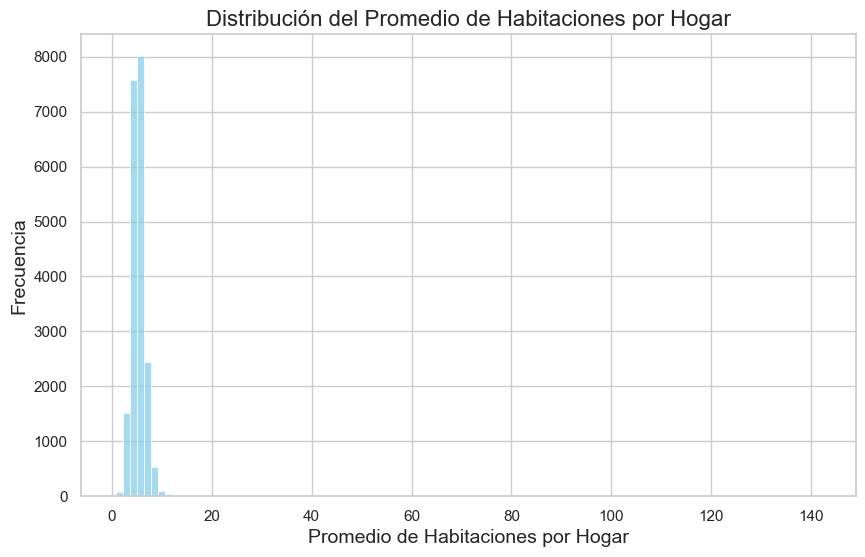

In [123]:

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_rooms_per_household'], bins=100, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Promedio de Habitaciones por Hogar', fontsize=16)
plt.xlabel('Promedio de Habitaciones por Hogar', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

####
No se aprecia pero hay valores bastante altos en los promedios que tienen muy baja frecuencia (tan baja que no se aprecia en el grafico).
Voy a probar de visualizar estos valores de otra forma que pueda apreciar mejor.

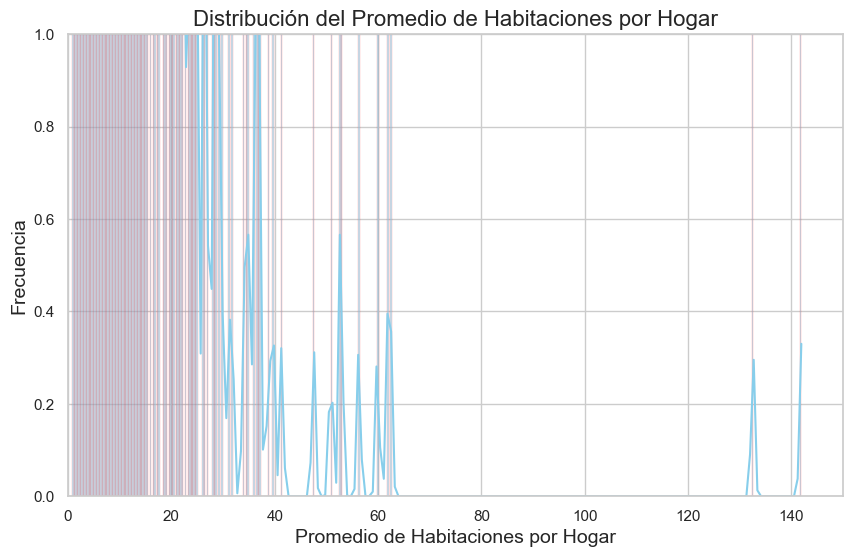

In [124]:
# Primero voy a visualizar el histograma anterior de una mejor manera
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_rooms_per_household'], bins=500, kde=True, color='skyblue', edgecolor='red')

# Limitar el eje X hasta 6
plt.xlim(0, 150)
plt.ylim(0, 1)

# Añadir títulos y etiquetas
plt.title('Distribución del Promedio de Habitaciones por Hogar', fontsize=16)
plt.xlabel('Promedio de Habitaciones por Hogar', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()


Observamos que hay outliers que no tienen sentido. Podrian ser real pero no representa lo que ocurre en la mayoria de registros y como me distorsiona el dataframe, he decidido removerlos.

### 🧹🧼 Remoción de Outliers🫧🧽

In [125]:
# Remuevo los outliers de la columna avg_rooms_per_household

# Calcular Q1 (percentil 25) y Q3 (percentil 75) para avg_rooms_per_household
Q1 = df['avg_rooms_per_household'].quantile(0.25)
Q3 = df['avg_rooms_per_household'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Calcular los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame eliminando los outliers
df = df[(df['avg_rooms_per_household'] >= lower_bound) & 
        (df['avg_rooms_per_household'] <= upper_bound)]

# Confirmar la eliminación de outliers
print(f'Número de filas después de eliminar outliers: {df.shape[0]}')



Número de filas después de eliminar outliers: 19925


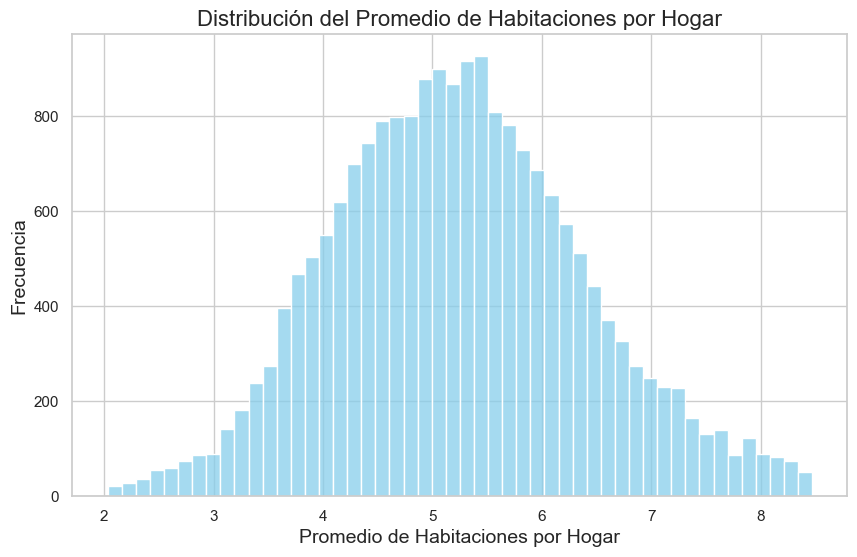

In [126]:
# Ahora vemos como luce el histograma nuevamente ahora que quitamos los outliers de avg_rooms_per_household

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_rooms_per_household'], bins=50, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Promedio de Habitaciones por Hogar', fontsize=16)
plt.xlabel('Promedio de Habitaciones por Hogar', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Ahora parece mas una distribución normal

Ahora quiero hacer una inspección a la columna de median_house_value

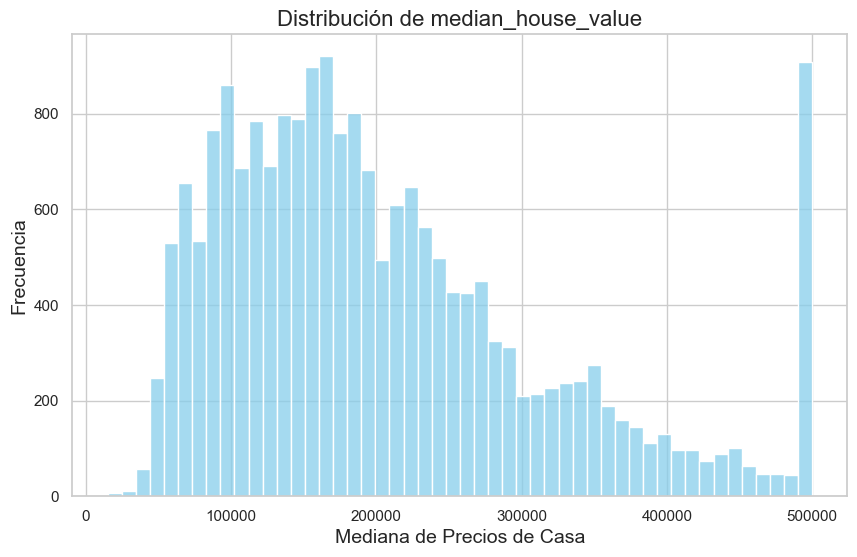

In [127]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución de median_house_value', fontsize=16)
plt.xlabel('Mediana de Precios de Casa', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Aca tambien me llama la atención la cantidad de registros que aparentemente tienen un valor mayor de 500.000 USD, que puede que sea cierto pero puede que sean casos atipicos que me distorsionan el dataframe.
He decidido remover estos registros.

In [128]:
# Remuevo los registros donde median_house_value es mayor a 500.000

# Filtrar filas que estén dentro de los límites y sobrescribir df
df = df[(df['median_house_value'] <= 500000)]

# Quiero visualizar maximos y minimos
df.describe().round(1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms_per_household,avg_bedrooms_per_household
count,19077.0,19077.0,19077.0,19077.0,19077.0,19077.0,19077.0,19077.0,19077.0,19077.0,19077.0
mean,-119.6,35.6,28.6,2601.9,536.6,1451.1,504.4,3.7,192390.2,5.2,1.1
std,2.0,2.1,12.5,2139.2,414.9,1142.8,382.4,1.5,97385.7,1.1,0.1
min,-124.4,32.5,1.0,6.0,2.0,3.0,2.0,0.5,14999.0,2.0,0.3
25%,-121.8,33.9,18.0,1443.0,298.0,808.0,285.0,2.5,116500.0,4.4,1.0
50%,-118.5,34.3,29.0,2107.0,436.0,1188.0,414.0,3.4,174000.0,5.2,1.0
75%,-118.0,37.7,37.0,3103.0,644.0,1751.0,607.0,4.6,248100.0,5.9,1.1
max,-114.6,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500000.0,8.5,3.1


Vuelvo a observar la distribucion de median_house_value

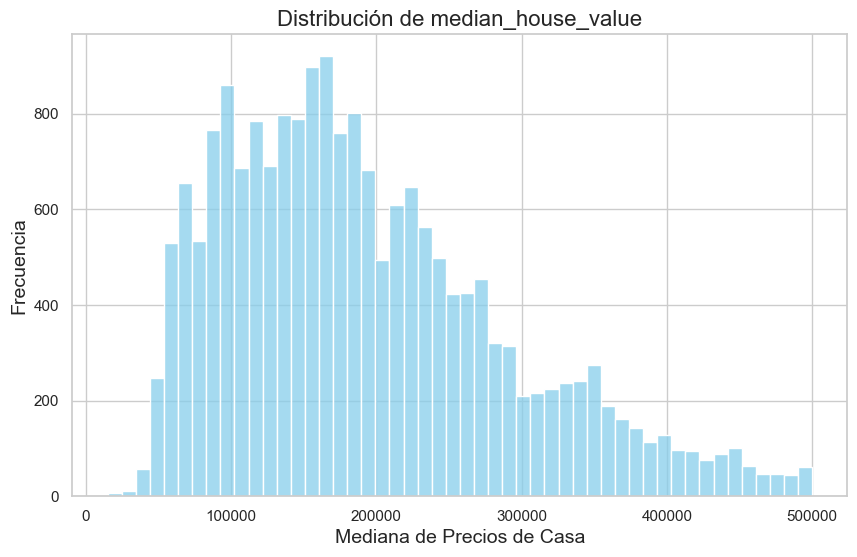

In [129]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución de median_house_value', fontsize=16)
plt.xlabel('Mediana de Precios de Casa', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Ahora tiene forma de distribucion asimetrica con caida hacia la derecha y esta mas aceptable que antes.

### 🥽 Analisis univariado 🥽

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'avg_rooms_per_household'}>,
        <Axes: title={'center': 'avg_bedrooms_per_household'}>, <Axes: >]],
      dtype=object)

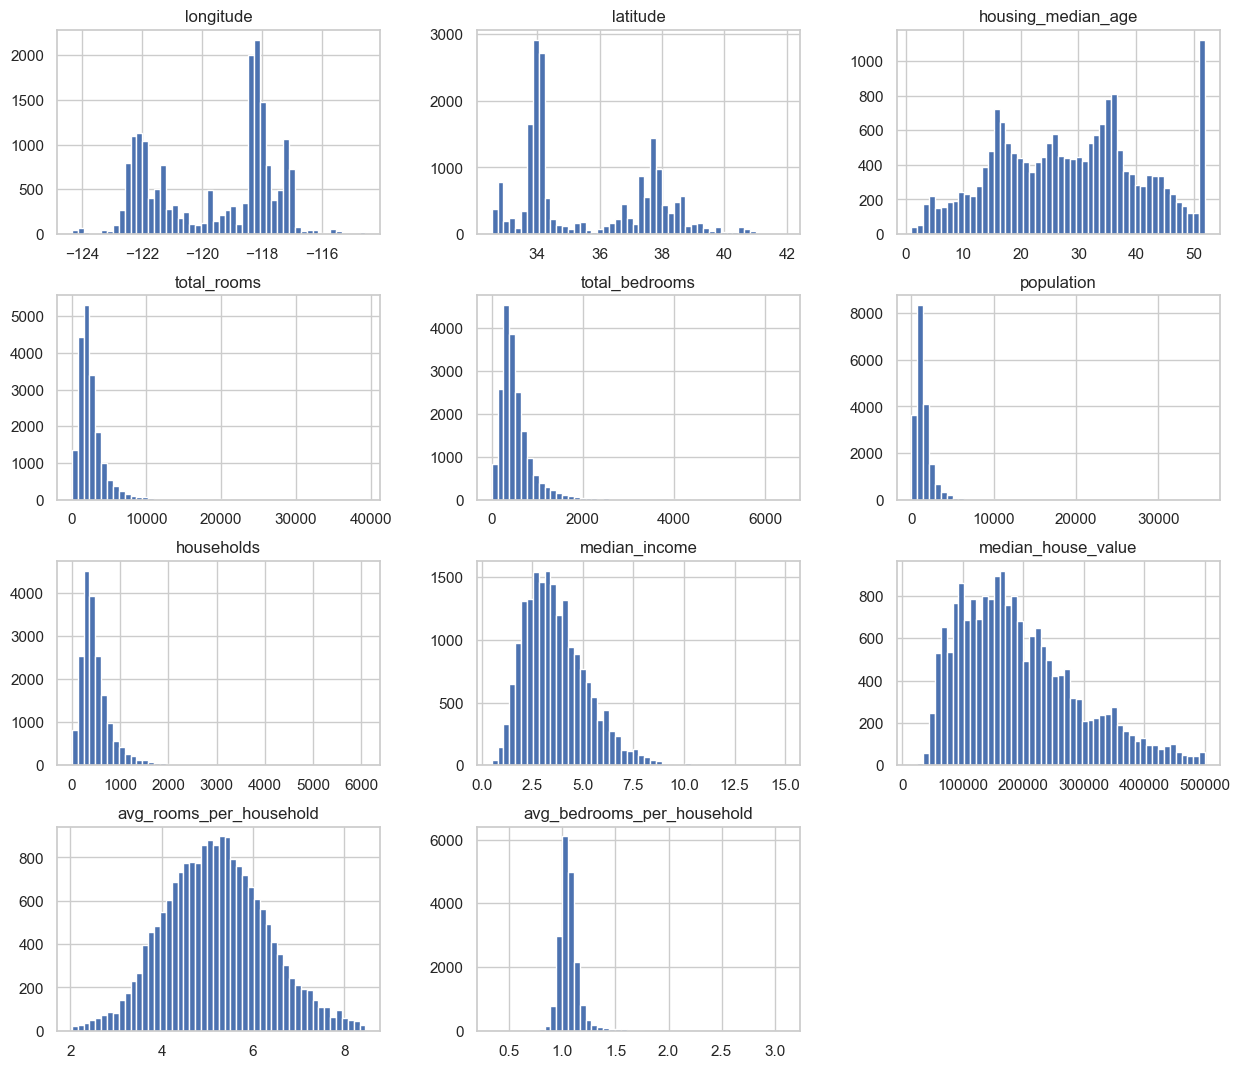

In [130]:
df.hist(figsize= (15,13), bins= 50)

In [131]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'avg_rooms_per_household',
       'avg_bedrooms_per_household'],
      dtype='object')

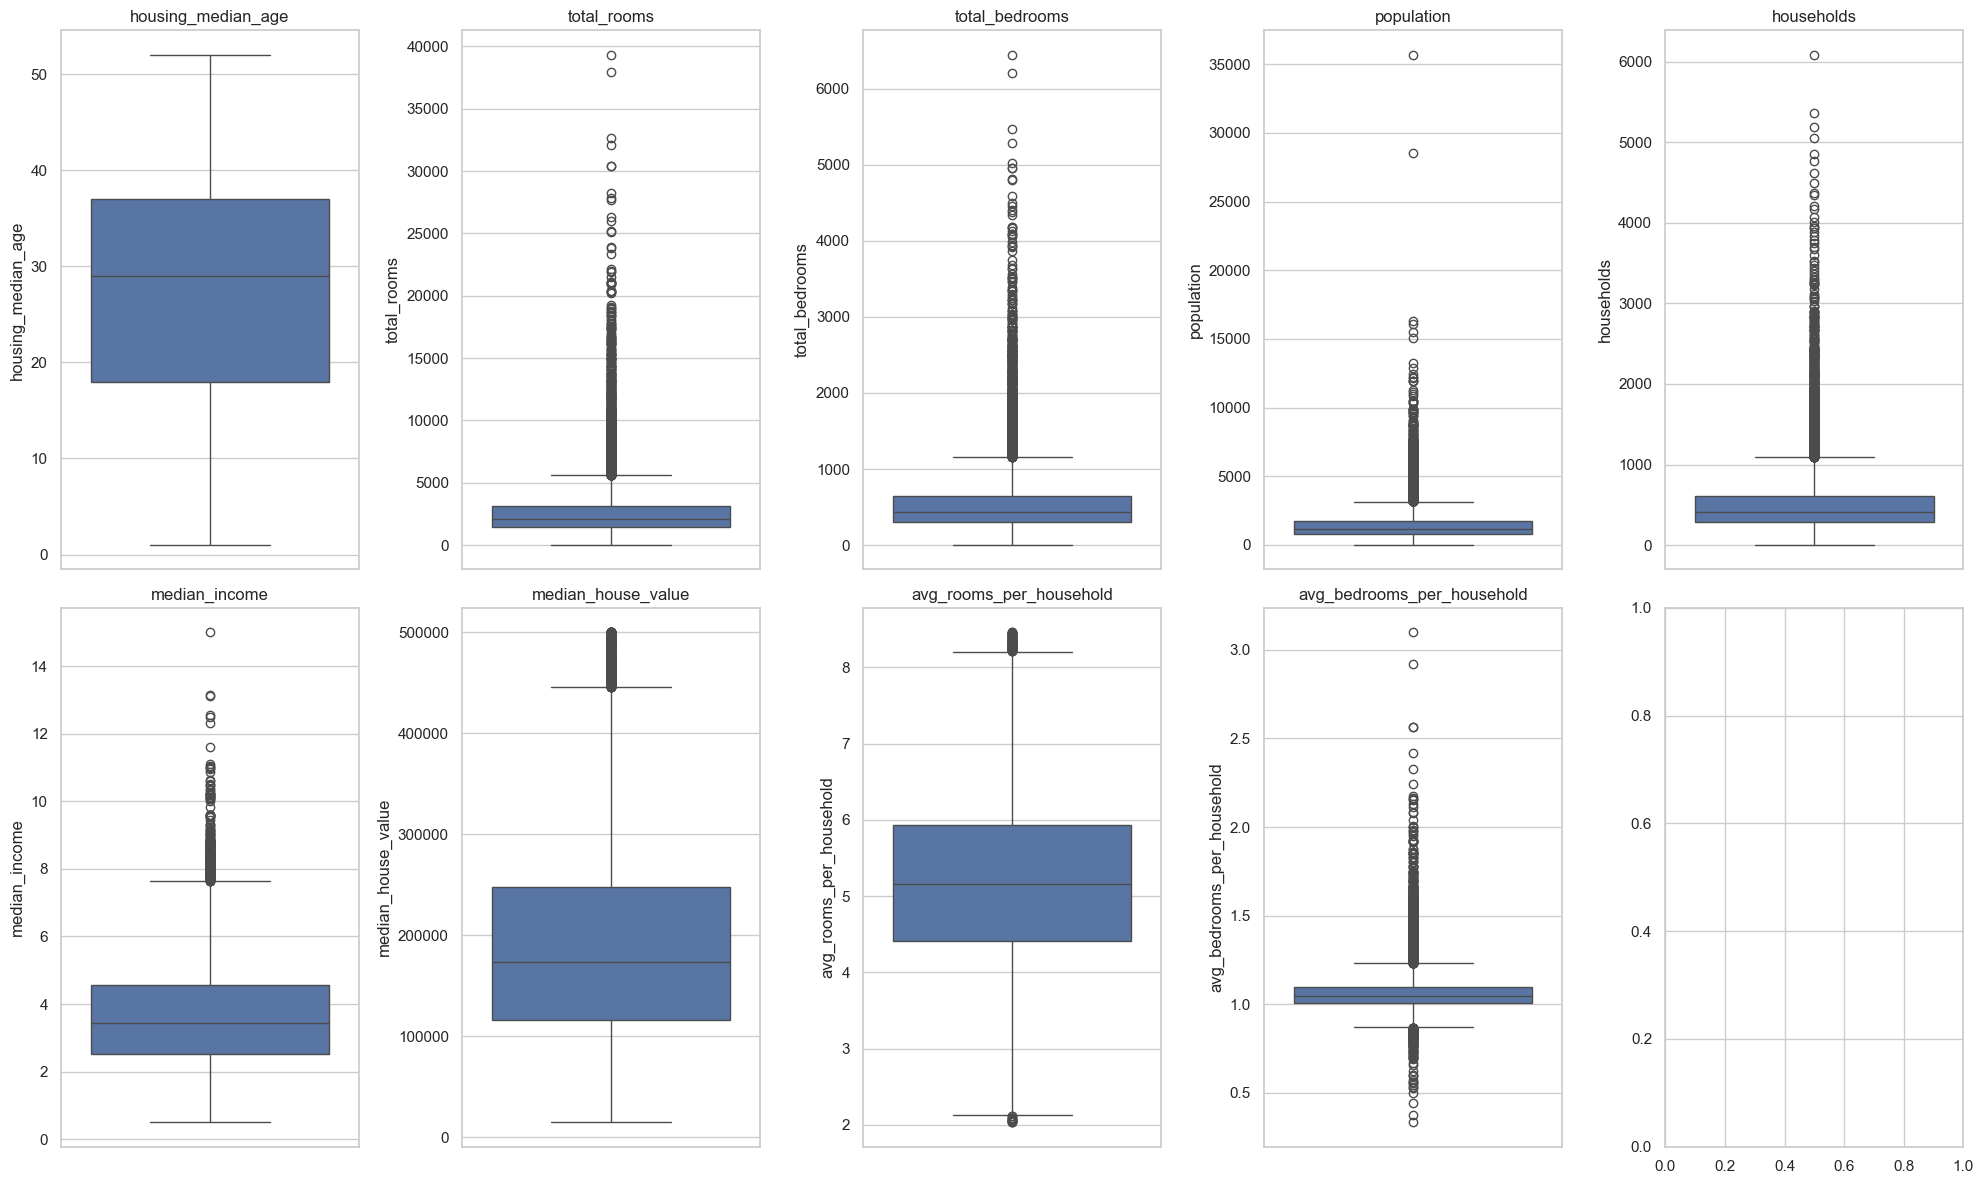

In [132]:
# Lista de variables para graficar
variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
             'median_income', 'median_house_value', 'avg_rooms_per_household', 'avg_bedrooms_per_household']

# Configurar la figura
fig, axes = plt.subplots(2, len(variables)//2 + len(variables)%2, figsize=(20, 12))  # Dividir en 2 filas
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Crear un boxplot para cada variable
for ax, variable in zip(axes, variables):
    sns.boxplot(y=variable, data=df, ax=ax)
    ax.set_title(variable)

# Ajustar diseño
plt.tight_layout()
plt.show()

No removeré otros outliers ya que creo que son datos que no estan lejos de la realidad.
Las columnas total_rooms y total_bedrooms es probable que ya no se necesiten. Sin embargo, no las voy a desestimar todavía.

Para saber que porcentaje representan las casas cerca de la bahia u oceano, hacemos un grafico de torta

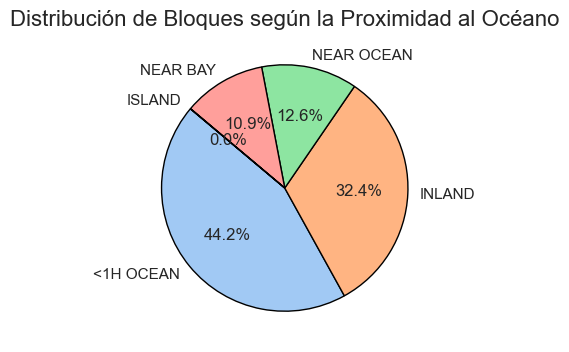

In [136]:
# Para saber que porcentaje representan las casas cerca de la bahia u oceano, hacemos un grafico de torta

# Contar la cantidad de bloques por categoría de proximidad al océano
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Definir una paleta de colores agradables
colors = sns.color_palette('pastel')

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(ocean_proximity_counts,labels=ocean_proximity_counts.index,colors=colors,autopct='%1.1f%%',startangle=140,wedgeprops={'edgecolor': 'black'})

# Añadir título
plt.title('Distribución de Bloques según la Proximidad al Océano', fontsize=16)

# Mostrar el gráfico
plt.show()

Quiero ver como es la distribucion de las casa que cuestan entre 400.000 y 500.000 de acuerdo a su ocean_proximity

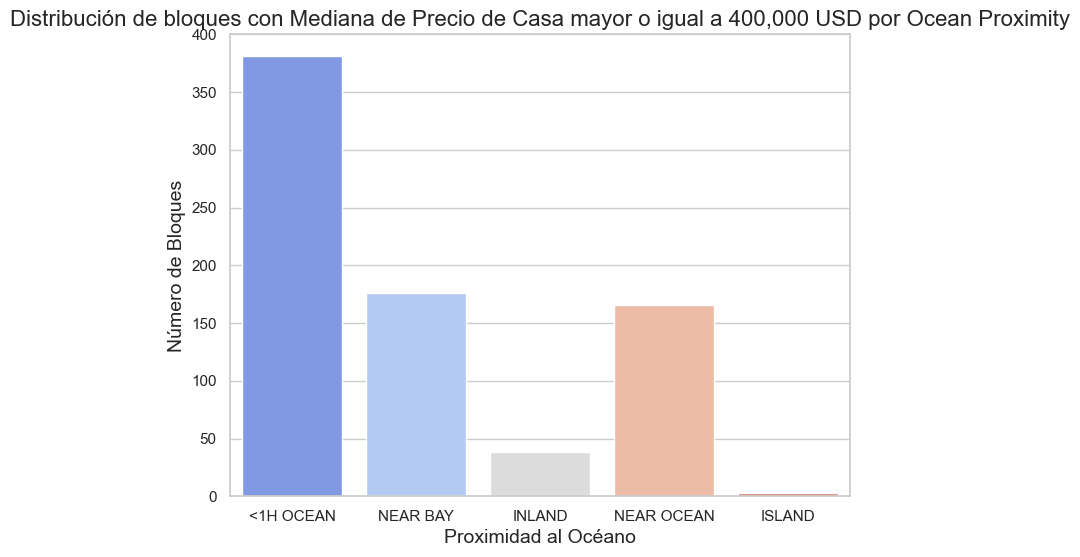

In [144]:
# Filtrar las casas con median_house_value igual a 500000
filtered_houses = df[(df['median_house_value'] >= 400000) & (df['median_house_value'] <= 500000)]

# Crear un gráfico de barras para mostrar la distribución de ocean_proximity
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_houses, x='ocean_proximity', hue='ocean_proximity', palette='coolwarm', dodge=False)

# Añadir títulos y etiquetas
plt.title('Distribución de bloques con Mediana de Precio de Casa mayor o igual a 400,000 USD por Ocean Proximity', fontsize=16)
plt.xlabel('Proximidad al Océano', fontsize=14)
plt.ylabel('Número de Bloques', fontsize=14)

# Mostrar el gráfico
plt.show()


Observamos que la mayoria de casas que superan la mediana de 400.000 usd estan a menos de 1 hora del oceano. En la siguiente grafica podemos apreciar que se trata de outliers.

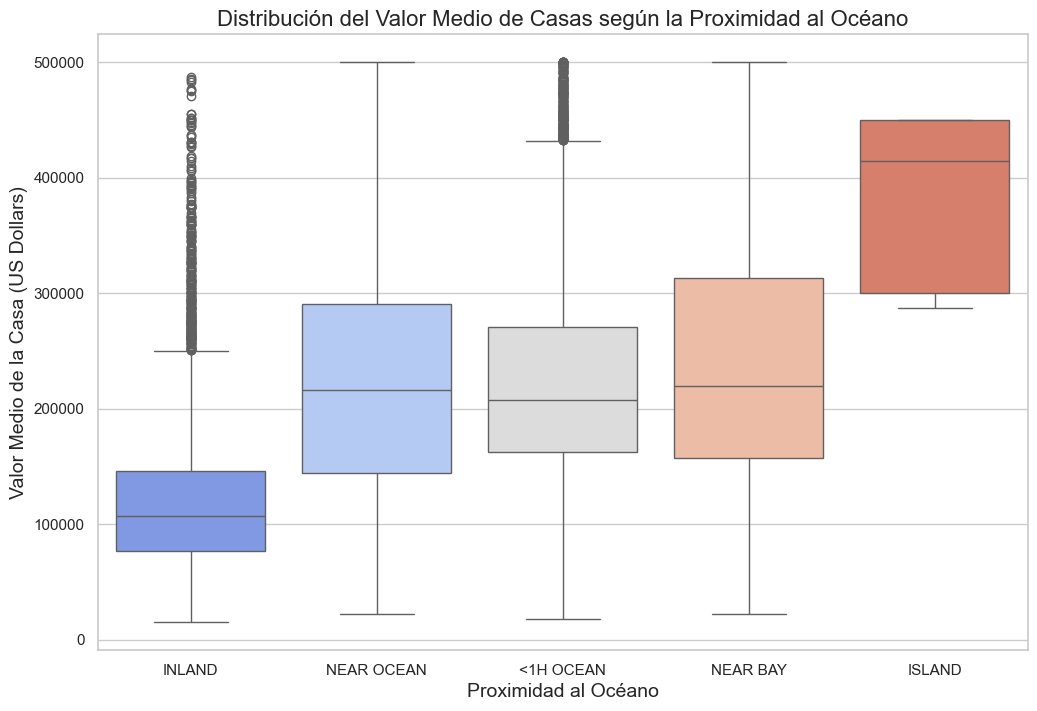

In [138]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de caja para 'median_house_value' vs 'ocean_proximity'
plt.figure(figsize=(12, 8))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, hue='ocean_proximity', palette='coolwarm', dodge=False)

# Añadir títulos y etiquetas
plt.title('Distribución del Valor Medio de Casas según la Proximidad al Océano', fontsize=16)
plt.xlabel('Proximidad al Océano', fontsize=14)
plt.ylabel('Valor Medio de la Casa (US Dollars)', fontsize=14)

# Mostrar el gráfico
plt.show()

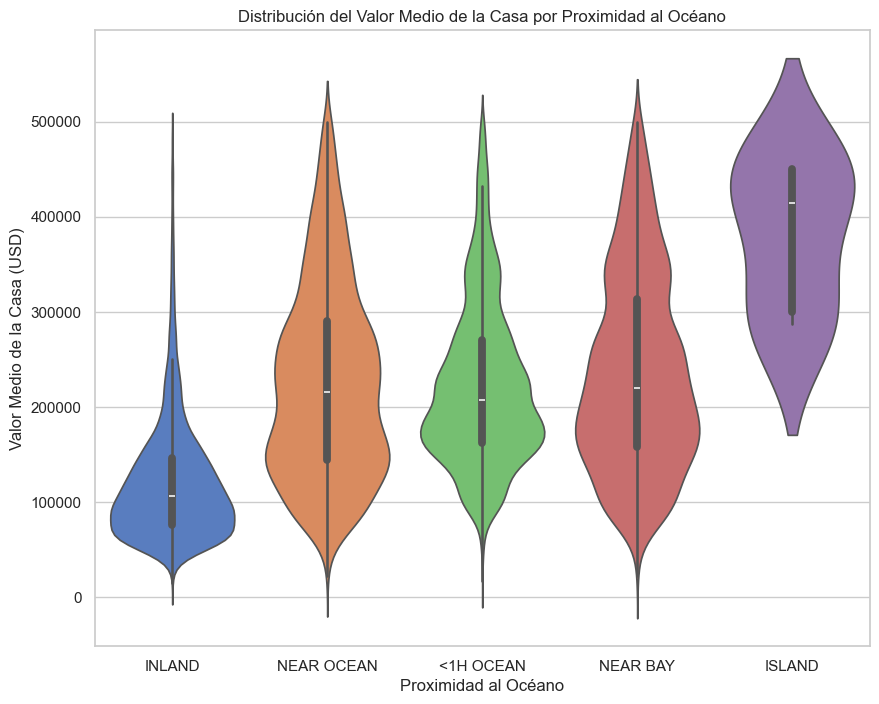

In [142]:
# Violin Plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='ocean_proximity', y='median_house_value', hue='ocean_proximity', data=df, palette='muted', dodge=False, legend=False)
plt.title('Distribución del Valor Medio de la Casa por Proximidad al Océano')
plt.xlabel('Proximidad al Océano')
plt.ylabel('Valor Medio de la Casa (USD)')
plt.show()


##### Se aprecia la concentración de valores de casas por proximidad al oceano.
##### Para INLAND estan entre 50.000 y 150.000
##### Para NEAR OCEAN estan entre 100.000 y 300.000
##### Para <1H OCEAN estan entre 120.000 y 250.000
##### Para NEAR BAY estan variadas pero a mayoria entre 150.000 y 350.000
##### Para ISLAND estan entre 350.000 y 500.000

### 🧬 Analisis bivariado 🧬

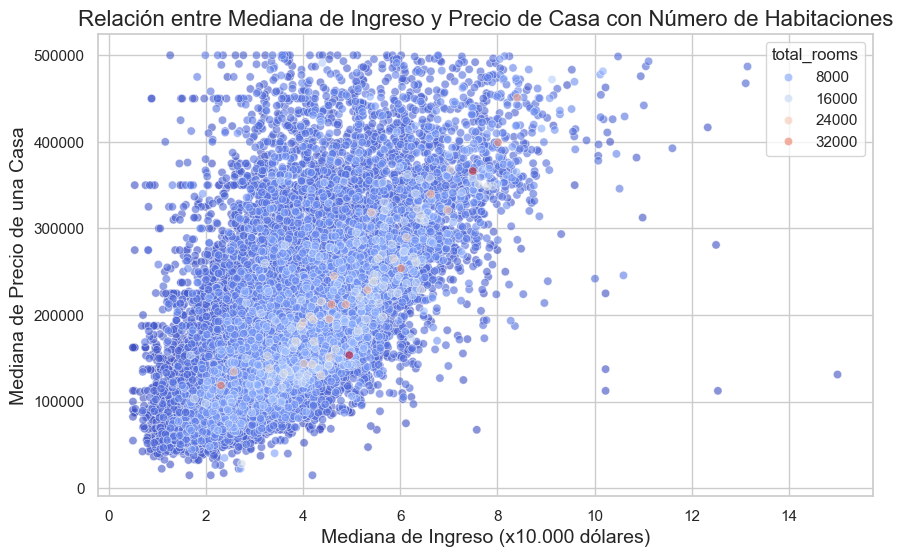

In [133]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, hue='total_rooms', palette='coolwarm', alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Relación entre Mediana de Ingreso y Precio de Casa con Número de Habitaciones', fontsize=16)
plt.xlabel('Mediana de Ingreso (x10.000 dólares)', fontsize=14)
plt.ylabel('Mediana de Precio de una Casa', fontsize=14)

# Mostrar el gráfico
plt.show()


Para explicar un poco el grafico anterior:

Tomare como ejemplo uno de los puntos rojo oscuro.
Quiere decir que en ese bloque/conjunto residencial, el cual cuenta con 32 mil habitaciones o mas, la mediana de ingreso es de 50 mil USD y la mediana de precio para una casa alli esta alrededor de 160 mil USD.
Se puede apreciar que son pocos los bloques/conjuntos residenciales que tienen tan alto el numero de 'total rooms'.

Una cosa que me llama la atencion es que parece haber varios pisos para la mediana de precio de una casa. Se nota un piso un poco por debajo de los 300.000, otro a los 350.000, otro a los 450.000 y otro a los 500.000. Estos pisos parecen ignorar la mediana de ingreso, especialmente el ultimo; es decir que en ese piso no influye mucho el ingreso ya que este varia mucho en esos pisos.

Una explicacion que pienso que puede ser es el siguiente escenario: Tu casa esta muy cerca a la costa, por lo tanto tiene un valor muy alto pero la familia no tiene ingresos altos. Pudieron haber adquirido la casa antes de que la propiedad adquiriera tanto valor.

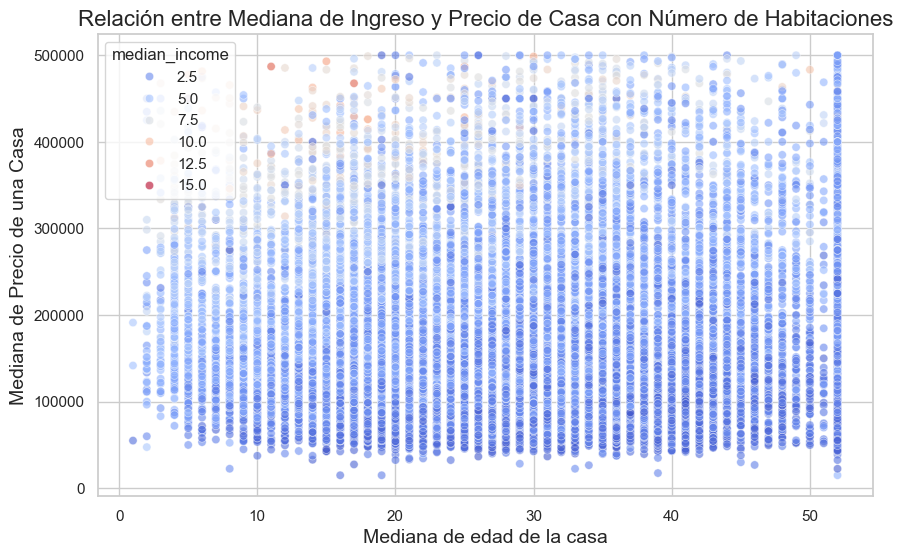

In [134]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, hue='median_income', palette='coolwarm', alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Relación entre Mediana de Ingreso y Precio de Casa con Número de Habitaciones', fontsize=16)
plt.xlabel('Mediana de edad de la casa', fontsize=14)
plt.ylabel('Mediana de Precio de una Casa', fontsize=14)

# Mostrar el gráfico
plt.show()

######
De esta grafica poder decir que la gente con mayor poder adquisitivo eligen vivir en casas con una vida menor a 30 años.

Tambien se aprecia que de las casas que valen 500.000, el poder adquisitivo disminuye a medida que la casa es mas vieja, lo que respalda el escenario descrito anteriormente.

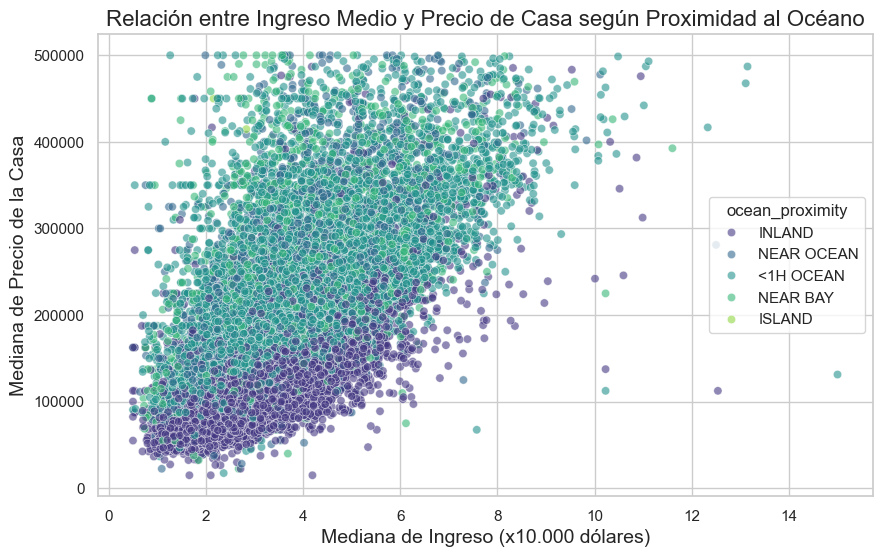

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, hue='ocean_proximity', palette='viridis', alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Relación entre Ingreso Medio y Precio de Casa según Proximidad al Océano', fontsize=16)
plt.xlabel('Mediana de Ingreso (x10.000 dólares)', fontsize=14)
plt.ylabel('Mediana de Precio de la Casa', fontsize=14)

# Mostrar el gráfico
plt.show()


Se observa que las casas con mayor mediana de valor estan muy cercanas a la bahia o al oceano.

Se observa que la mayoria de casas que estan adentro en tierra firme son habitadas por familias con mediana de ingresos menor a 60 mil USD, y el valor de la casa es proporcional a el.

Por ultimo, se observan bastantes bloques cuyas casa tienen valor de 500.000 USD, habitadas por familias con ingresos variados, pero estan cerca de la bahia o el oceano. Debe tratarse de esas casas que estan en toda la linea de la costa. Su precio es el maximo.

### ⚗️ Matriz de correlación - Coeficiente de Pearson 🧪



median_house_value            1.000000
median_income                 0.643116
ocean_proximity_encoded       0.403595
avg_rooms_per_household       0.258108
total_rooms                   0.144249
households                    0.092376
total_bedrooms                0.078377
housing_median_age            0.074212
population                    0.006586
avg_bedrooms_per_household   -0.129128
Name: median_house_value, dtype: float64




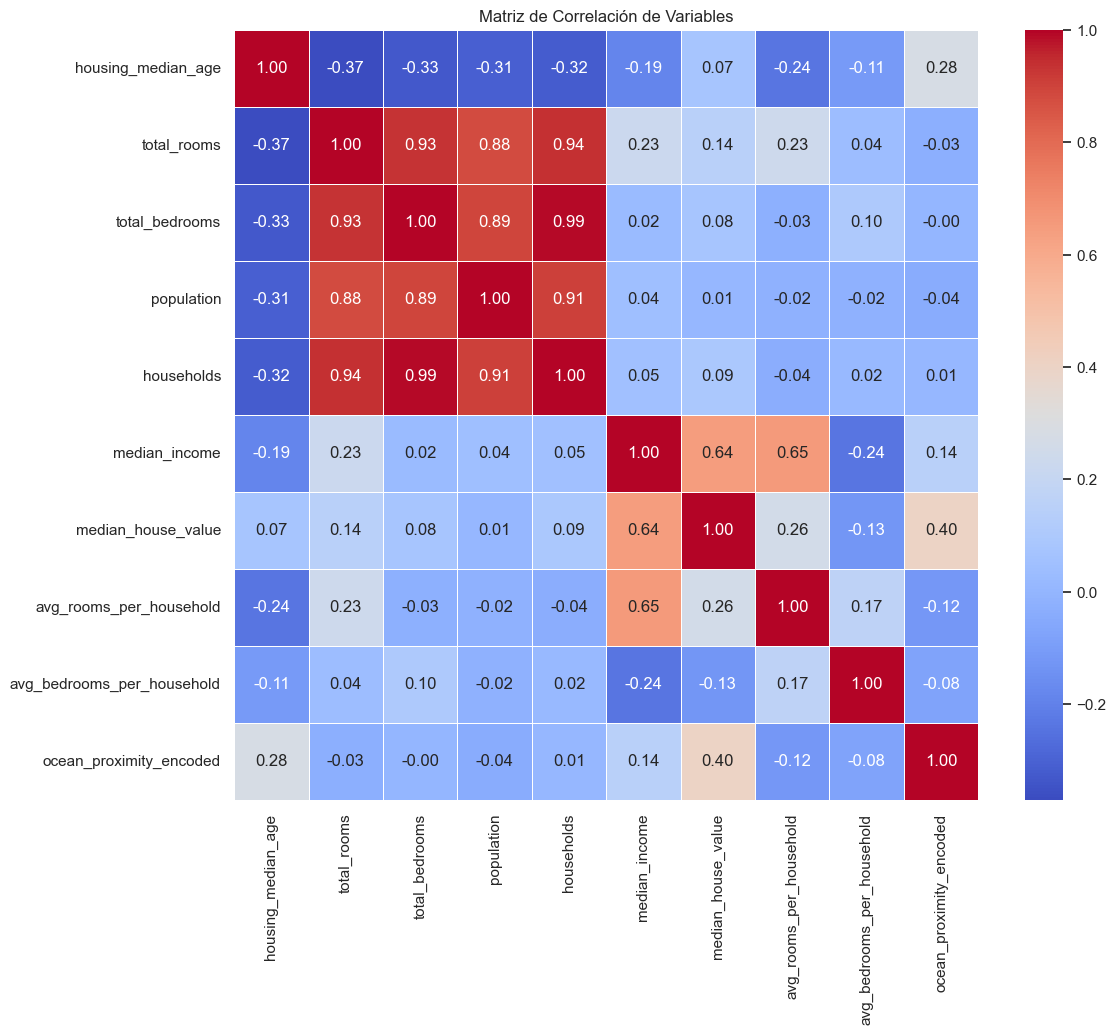

In [139]:
# Realizar ordinal encoding en la columna 'ocean_proximity'
encoder = OrdinalEncoder(categories=[["INLAND", "<1H OCEAN", "NEAR OCEAN", "NEAR BAY", "ISLAND"]])
df['ocean_proximity_encoded'] = encoder.fit_transform(df[['ocean_proximity']])

df_encoded = df.drop(columns=['longitude', 'latitude', 'ocean_proximity'])

# Calcular la tabla de correlación con las variables codificadas
correlation_matrix = df_encoded.corr()

# Mostrar la tabla de correlación con respecto a 'median_house_value'
print("\n")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Visualizar la matriz de correlación completa como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables')
print("\n")
plt.show()


Se observa que las variables mas influyentes en el precio son los ingresos, con 0.64, que me atrevo a decir que es obvio ya que mientras mas cara la propiedad quiere decir que el poder adquisitivo de la familia es mas alto; y la cercanía al oceano en segundo lugar. Tiene una correlación de 0.40 (moderada) lo que me da a entender que todas las casas cerca del oceano son costosas pero no todas las casas costosas estan cerca del oceano.

### 🗺️ Mapa de calor 🗺️

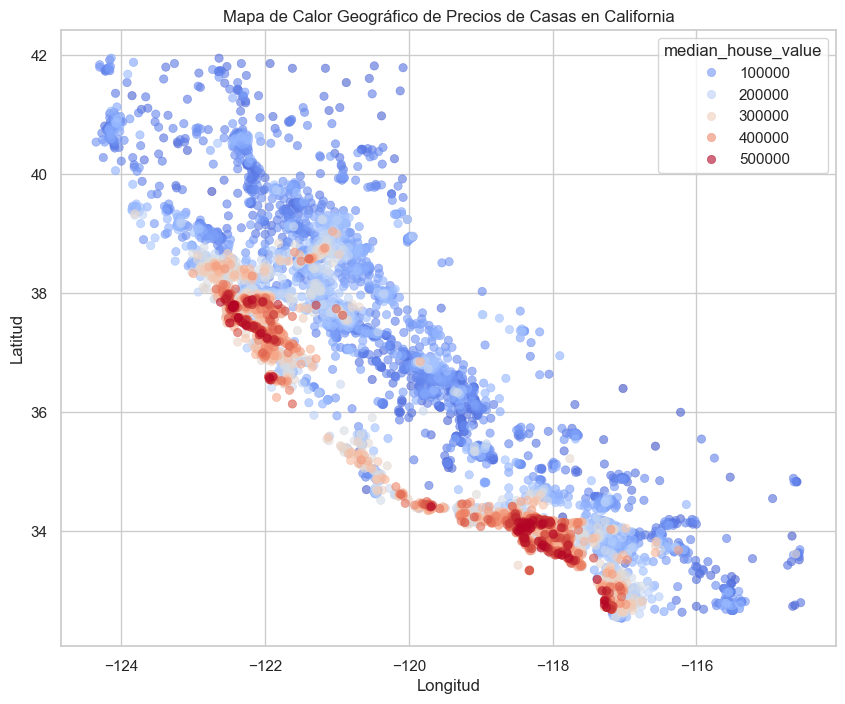

In [140]:

# Ordenar el DataFrame por 'median_house_value' en orden ascendente
df_sorted = df.sort_values(by='median_house_value', ascending=True)

# Mapa de Calor Geográfico
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_sorted, x='longitude', y='latitude', 
                          hue='median_house_value', palette='coolwarm', 
                          edgecolor=None, alpha=0.6)

plt.title('Mapa de Calor Geográfico de Precios de Casas en California')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()



##### Se observa que la mayoria de casas mas costosas estan cerca de la linea costera, y estan agrupadas en dos zonas.

### 📊 Analisis multivarido 📊

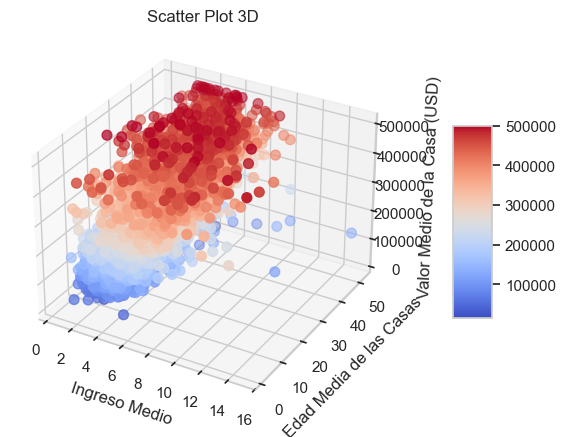

In [145]:
# Scatter Plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['median_income'], df['housing_median_age'], df['median_house_value'], c=df['median_house_value'], cmap='coolwarm', s=50)
ax.set_xlabel('Ingreso Medio')
ax.set_ylabel('Edad Media de las Casas')
ax.set_zlabel('Valor Medio de la Casa (USD)')
plt.title('Scatter Plot 3D')
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()


Aca observamos que la edad media no afecta mucho la variacion de precios.